# BY:  MANISH KUMAR             
(# GRIPDEC20)
(# The Spark Foundation)

# Task 1: Predict the percentage of an student based on the no. of study hours.

## Prediction Using Supervised M.L

Importing the Required Libraries

In [1]:
##Importing important libraries---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Reading the Data

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking for null values
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required

Plotting

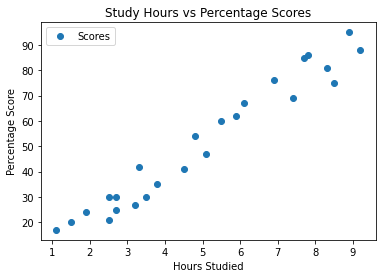

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

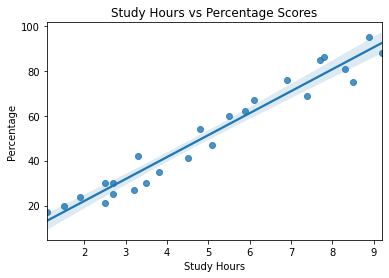

In [5]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing our data

In [6]:
X = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

Now that we have the attributes and labels defined, the next step is to split this data into training and test sets.

In [7]:
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


We have the training and testing sets ready for training our model.

## Training the Algorithm

Using Scikit-Learn library

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training is completed.")


Training is completed.


In [10]:
print ("Coefficient: ", regressor.coef_)
print ("Intercept:  ", regressor.intercept_)


Coefficient:  [9.91065648]
Intercept:   2.0181600414346974


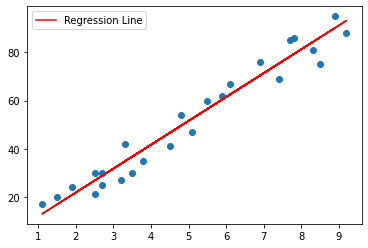

In [11]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

## Making Predictions

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))


Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


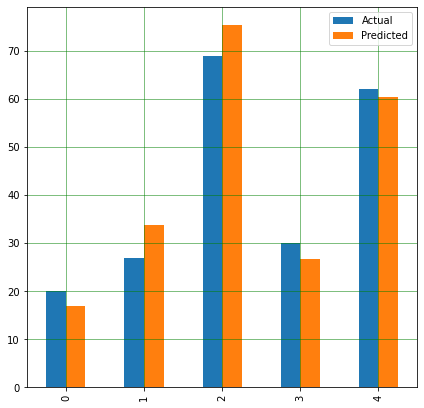

In [15]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

### Testing

In [16]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Percentage = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Percentage = 93.69173248737535


#### Evaluating the model 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
r_score=r2_score(y_pred,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-Squared: 0.9546785947197246


R-squared gives the goodness of the fit and as can be seen it is 95.46% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 95.46%

#### Conclusion 

### From the above result we can say that if a studied for 9.25 hrs then student will secured 93.69 percent.

## Thank You